In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Loading the Data

In [3]:
os.listdir('data')

['test', 'malaria_cell_classification_code', 'train']

In [5]:
test_path = 'data/test'
train_path = 'data/train'

In [6]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [7]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [8]:
os.listdir(train_path+'/parasitized')[0]

'C182P143NThinF_IMG_20151201_172842_cell_23.png'

In [9]:
para_cell = train_path+'/parasitized/C182P143NThinF_IMG_20151201_172842_cell_23.png'

In [10]:
para_cell

'data/train/parasitized/C182P143NThinF_IMG_20151201_172842_cell_23.png'

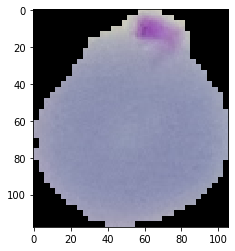

In [11]:
plt.imshow(imread(para_cell))

In [12]:
os.listdir(train_path+'/uninfected')[0]

'C77P38ThinF_IMG_20150602_143524_cell_78.png'

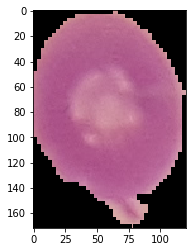

In [13]:
uni_cell = train_path+'/uninfected/C77P38ThinF_IMG_20150602_143524_cell_78.png'
plt.imshow(imread(uni_cell))

In [59]:
imread(para_cell).max()

0.8156863

In [53]:
print(len(os.listdir(train_path+'/parasitized')))
print(len(os.listdir(train_path+'/uninfected')))

12479
12479


In [54]:
print(len(os.listdir(test_path+'/parasitized')))
print(len(os.listdir(test_path+'/uninfected')))

1300
1300


In [56]:
dim_1 = []
dim_2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected/'+image_filename)
    d1, d2, colors = img.shape
    dim_1.append(d1)
    dim_2.append(d2)

In [57]:
np.array(dim_1).mean()

130.92538461538462

In [58]:
np.array(dim_2).mean()

130.75

In [19]:
image_shape = (130, 130, 3)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

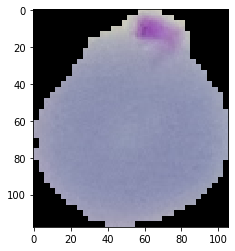

In [23]:
parat_cell = imread(para_cell)
plt.imshow(parat_cell)

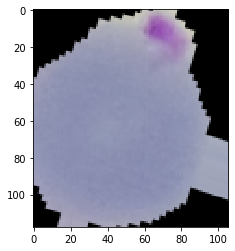

In [24]:
plt.imshow(image_gen.random_transform(parat_cell))

In [77]:
batch_size = 16
train_img_gen = image_gen.flow_from_directory(train_path,
                                              target_size=image_shape[:2], 
                                              class_mode='binary', 
                                              batch_size=batch_size)

test_img_gen = image_gen.flow_from_directory(test_path, 
                                             target_size=image_shape[:2], 
                                             class_mode='binary', 
                                             batch_size=batch_size,
                                             shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [78]:
print(train_img_gen.class_indices)
print(test_img_gen.class_indices)

{'parasitized': 0, 'uninfected': 1}
{'parasitized': 0, 'uninfected': 1}


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [80]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [82]:
r = model.fit(train_img_gen,
              epochs=20,
              validation_data=test_img_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 1302s 835ms/step - loss: 0.8391 - accuracy: 0.5449 - val_loss: 0.6871 - val_accuracy: 0.5692
Epoch 2/20
1560/1560 [==============================] - 1357s 870ms/step - loss: 0.6789 - accuracy: 0.5791 - val_loss: 0.6687 - val_accuracy: 0.6000
Epoch 3/20
1560/1560 [==============================] - 1344s 862ms/step - loss: 0.6694 - accuracy: 0.5978 - val_loss: 0.6718 - val_accuracy: 0.6035
Epoch 4/20
1560/1560 [==============================] - 1346s 863ms/step - loss: 0.5309 - accuracy: 0.7253 - val_loss: 0.2245 - val_accuracy: 0.9292
Epoch 5/20
1560/1560 [==============================] - 1341s 859ms/step - loss: 0.2141 - accuracy: 0.9351 - val_loss: 0.2590 - val_accuracy: 0.9231
Epoch 6/20
1560/1560 [==============================] - 1353s 867ms/step - loss: 0.1853 - accuracy: 0.9444 - val_loss: 0.1786 - val_accuracy: 0.9419
Epoch 7/20


Text(0.5, 1.0, 'Accuracy evolution')

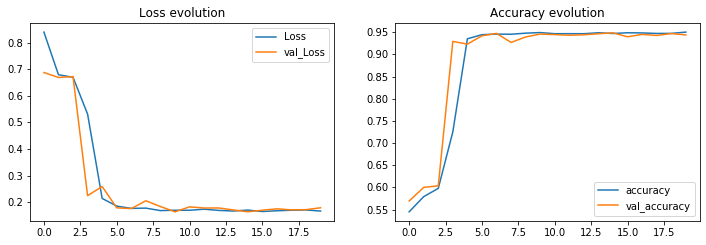

In [83]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [84]:
evaluation = model.evaluate(test_img_gen)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

  ...
    to  
  ['...']
163/163 [==============================] - 52s 320ms/step - loss: 0.1774 - accuracy: 0.9415
Test Accuracy : 94.15%


In [85]:
evaluation = model.evaluate(train_img_gen)
print(f'Train Accuracy : {evaluation[1] * 100:.2f}%')

  ...
    to  
  ['...']
1560/1560 [==============================] - 500s 321ms/step - loss: 0.1616 - accuracy: 0.9485
Train Accuracy : 94.85%


In [86]:
from tensorflow.keras.models import load_model

model.save('cnn_20_epochs.h5')

In [87]:
pred = model.predict_generator(test_img_gen)

In [88]:
pred > 0.5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [89]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

pd.DataFrame(classification_report(test_img_gen.classes, pred > 0.5, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.947123,0.937595,0.942308,0.942359,0.942359
recall,0.936923,0.947692,0.942308,0.942308,0.942308
f1-score,0.941995,0.942617,0.942308,0.942306,0.942306
support,1300.000000,1300.000000,0.942308,2600.000000,2600.000000


In [91]:
confusion_matrix(test_img_gen.classes, pred > 0.5)

array([[1218,   82],
       [  68, 1232]])